In [4]:
import pandas as pd

one = pd.read_csv("tmp_survey/1.txt")
two = pd.read_csv("tmp_survey/2.txt")
three = pd.read_csv("tmp_survey/3.txt")
four = pd.read_csv("tmp_survey/4.txt")

In [5]:
example_ststis = pd.concat([one,two,three,four],axis=1)

In [7]:
example_ststis.describe()

/home/yuan/anaconda2/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,63,104,93,85
count,8574.000000,8203.000000,6524.000000,8761.000000
mean,443.015512,401.826039,226.094114,447.435795
std,195.357991,176.532789,90.610438,199.649457
min,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,299.000000
50%,NaN,NaN,NaN,452.000000
75%,NaN,NaN,NaN,601.000000
max,1089.000000,1086.000000,642.000000,1044.000000


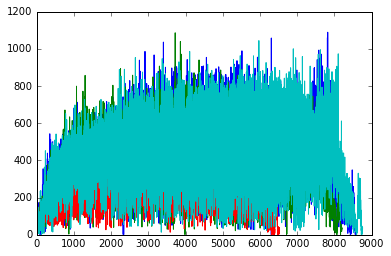

In [9]:
import matplotlib.pyplot as plt

% matplotlib inline

for i in range(4):
    plt.plot(example_ststis.iloc[:,i])
    plt.hold

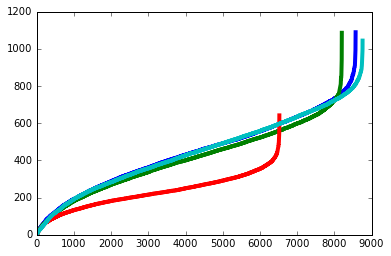

In [11]:
for i in range(4):
    plt.plot(sorted(example_ststis.iloc[:,i]),linewidth=4)
    plt.hold

<Container object of 4 artists>

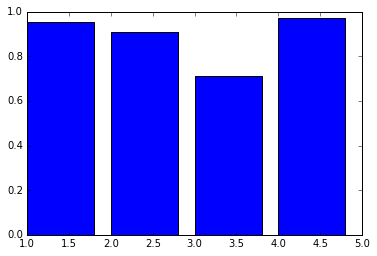

In [16]:
useless = []
for i in range(4):
    useless.append(float(sum(example_ststis.iloc[:,i] >= 70))/example_ststis.iloc[:,i].shape[0])
    
plt.bar([1,2,3,4],useless)


<Container object of 4 artists>

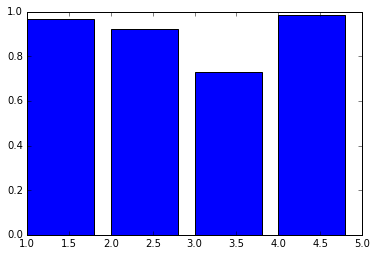

In [17]:
useless = []
for i in range(4):
    useless.append(float(sum(example_ststis.iloc[:,i] >= 45))/example_ststis.iloc[:,i].shape[0])
    
plt.bar([1,2,3,4],useless)

## 结论
　　大多数表达谱，小于70个峰的数据都小于5%，小于45个峰更是稀少，因此可视为噪声
  　但仍有少数有接近30%的二级谱峰数少于45，需要考虑是为什么
## 方案
    目前仍决定将过少的视为噪声，直接去掉，阈值选取前45个峰

### CRC32 hashing
这是目前min-hash的一种实现，CRC即循环冗余校验，32表示其对应多项式次数最高的是32次方

## -------------------- min hash ---------------------------
其中涉及到为什么要划分为多个block且每个block中有几个hash函数
而且同一个block内取“且”而多个block间取“或”
不同于东大张老师的说法，即降低FP和FN,这个现在看起来也确实不对
应该是从概率的角度来解释这一问题，详情见下一个cell

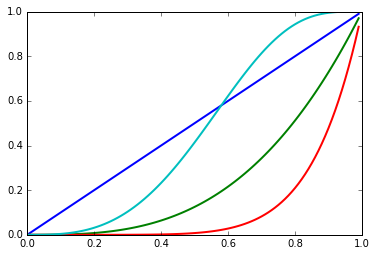

In [33]:
import numpy as np
similarity = np.arange(0,1,0.01)

p_1 = similarity
# m means the number of functions in one group
m = 3
p_2 = similarity ** m
p_3 = similarity ** (m + G)
# G means the number of function groups 
G = 4
p_4 = 1 - (1 - similarity ** m) ** G

p = [p_1,p_2,p_3,p_4]
for i in range(4):
    plt.plot(similarity, p[i],linewidth=2)
#plt.plot(similarity, p_2,linewidth=2)
#plt.plot(similarity, p_3,linewidth=2)

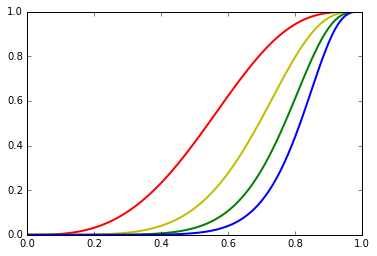

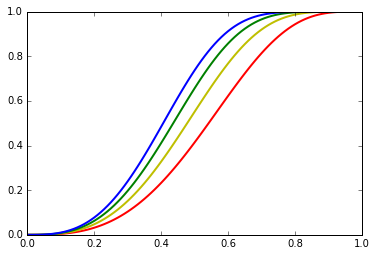

In [35]:
ms = [3,5,7,9]
gs = [4,6,8,10]
color = ['r','y','g','b']

similarity = np.arange(0,1,0.01)
p_4 = 1 - (1 - similarity ** m) ** G

for i in range(4):
    p_tmp = 1 - (1 - similarity ** ms[i]) ** 4
    plt.plot(similarity, p_tmp, color = color[i],linewidth=2)
    
plt.figure()
for i in range(4):
    p_tmp = 1 - (1 - similarity ** 3) ** gs[i]
    plt.plot(similarity, p_tmp, color = color[i],linewidth=2)
    
## 下图中，线条越靠近横轴，表示假阳性错误的发生率越低；
## 线条越靠近纵轴，模型越宽容

一个问题：哈希函数的个数设置是否与集合中可选项的个数有关

In [36]:
2 ** 32 -1

4294967295

In [1]:
## 直接用set计算两个集合的交集和并集十分慢
## 即使只有20000条数据，每计算100个数据的距离就需要半分钟

## ----------------------------- basic information ------------------------------

In [2]:
ms_tmp_1 = [113.1480255,11.9649391174,121.095459,3.6839823723,149.0530701,144.3273925781,167.1423492,25.1253948212,177.1099854,4.9602360725,190.0544281,1.2391679287,196.1053009,3.2343904972,202.2433319,5.5892300606,212.1048737,4.8281998634,217.0926819,15.2925605774,225.706665,3.4036540985,229.1539001,7.1037893295,233.1303406,5.2869429588,245.0814209,2.7421584129,251.217041,14.2840385437,255.210083,6.5599627495,256.2420044,2.2741582394,261.1028442,22.7896232605,261.8678894,22.1400737762,263.1349792,9.0280370712,263.9450378,5.5751838684,265.1132507,16.940158844,266.9140625,2.694217205,274.1320801,11.8985147476,276.0364075,3.5819044113,279.2626953,134.9337310791,281.9049988,6.0615110397,283.803894,5.7501749992,286.11026,11.8593101501,290.0325012,5.8940877914,291.7571106,15.0125322342,293.4119263,2.0436499119,296.1277466,31.075586319,299.0787354,13.8767061234,300.1954651,2.839309454,301.0710754,5.8703179359,302.9245605,11.0418319702,303.8988342,4.0924534798,306.8699036,6.7246851921,308.3275452,13.4726982117,309.157135,6.8263382912,310.7102356,15.9457836151,311.990387,14.7343358994,312.9949036,9.340877533,315.2197266,10.5443677902,316.0613098,4.7121167183,317.1598206,34.2781105042,318.2714233,20.685634613,319.0514832,40.7282600403,320.0085754,13.1282405853,321.0027771,1.8561930656,326.4556274,4.8442811966,329.1781921,13.2502164841,330.0820007,12.3395080566,330.9820251,10.1590662003,331.9749146,13.0399875641,333.2382813,70.4699935913,334.0937195,58.17603302,334.9346924,7.9542417526,337.1927795,2.7037937641,339.3377686,5.7854862213,340.1815186,3.7663524151,343.3764648,18.8738021851,344.0980835,12.1250228882,345.0401611,55.4445648193,346.0211182,23.651266098,347.0411072,67.8447570801,348.137207,72.1446990967,349.3596191,35.3582000732,350.0809326,137.1585693359,350.9595032,51.8777580261,353.0173035,11.0050354004,354.3609314,23.5447044373,355.1104431,46.0622825623,356.1097412,14.0213832855,356.9847107,88.7695999146,357.8897705,17.7699241638,359.1491089,9.9000253677,360.1368408,20.0333786011,361.0301208,19.7362937927,361.9050598,8.3890619278,363.0074463,35.2630386353,363.9979248,38.1754684448,365.0819397,15.4048681259,368.0602112,10.4955310822,369.111969,26.0673007965,371.0014343,52.1299476624,372.9745483,727.2835693359,373.9754028,520.6508178711,375.0636902,66.811126709,376.1412048,24.0606327057,377.4415283,2.1017992496,378.5606995,2.9434127808,379.4946289,9.0188331604,381.9412231,53.1438102722,382.7087402,25.9655361176,389.0777588,5.7148704529,390.7650146,29.8760166168,391.7067871,14.5385055542,397.6644287,1.8491439819,408.9896545,5.7643475533,409.979187,8.9310903549,418.9162903,1.848715663,525.7011108,6.7798724174]

In [6]:
len(ms_tmp_1)

208

In [16]:
ms_tmp_2 = [184.1968994,4.4073028564,191.1464691,15.3152399063,191.9111786,6.00776577,194.0076447,1.4504351616,195.1640015,27.8976821899,196.26091,10.7913656235,197.1768494,8.649515152,198.3009644,14.2013578415,199.1726532,215.0280761719,200.2182312,6.0631303787,201.1148376,48.6616096497,202.0273132,28.3027839661,203.130249,5.561820507,204.295578,5.4968762398,205.147995,8.5073881149,207.1533203,26.5013256073,208.191925,15.9050254822,209.1039734,60.3854408264,210.1340942,4.4508690834,211.1204987,34.3980293274,212.2229614,32.2480316162,213.1397705,53.2502632141,214.2228394,12.5729265213,215.2145081,30.7336120605,216.1864014,72.8900375366,217.1917114,390.5906066895,218.2147369,92.0227661133,219.1658478,48.176197052,220.0964203,20.3124275208,221.2246704,24.7834091187,222.1354828,49.2799987793,223.0744934,7.72747612,224.1976776,12.6588878632,225.1844482,55.4366188049,226.1902771,86.5537872314,227.1952515,598.2194213867,228.2877502,74.2194290161,229.2351074,87.8626403809,230.1226349,63.8397445679,231.2950439,17.6447582245,232.2098999,5.9626097679,233.2622833,54.4946784973,234.1138458,39.4632568359,235.2332611,24.5732574463,236.2442017,42.0438766479,237.1734619,66.2100753784,238.1764221,11.5374479294,239.2146301,18.6255455017,240.2632141,280.8782348633,241.2900696,31.445766449,242.1564331,91.4839324951,243.243988,137.1487426758,244.2395172,154.6087341309,245.124649,39.5767784119,246.258667,67.5697250366,247.2063751,22.4936714172,248.1507263,45.8535690308,249.1655426,34.9852600098,250.3339386,43.0307769775,251.3887177,61.6698532104,252.2624969,17.2616062164,253.2868805,28.6356811523,254.2770081,77.6045532227,255.1864471,78.0319061279,256.3521729,49.0772819519,257.2905273,37.1248474121,258.2113342,450.7335510254,259.2440491,60.2019462585,260.2289429,125.6887817383,261.2737122,57.3652381897,262.1975098,51.5335922241,263.1671143,15.4734277725,264.2880859,10.2303915024,265.2896118,25.2072143555,266.2479553,61.8963737488,267.2481995,49.8688735962,268.2163696,31.1834430695,269.3596802,33.6639976501,270.2868652,56.4777870178,271.4047241,46.5414886475,272.3404846,97.648651123,273.188446,18.6252555847,274.1781921,54.3665924072,275.2755432,17.7252864838,276.2972412,314.3311767578,277.2293091,50.3959770203,278.2698364,30.8263397217,279.3229065,33.6514778137,280.3371582,78.1117477417,281.2722168,17.7462177277,282.2602539,107.7343597412,283.2501221,46.1233825684,284.2201233,1140.2958984375,285.230011,273.0698852539,286.2197876,115.8310775757,287.2704468,65.9548187256,288.2537231,141.576461792,289.2789917,106.8503723145,290.2918701,23.6443519592,291.1898193,12.2889041901,292.3944092,18.0704421997,293.2690735,9.1760406494,294.2628784,55.8207931519,295.3999329,62.2434310913,296.2355347,65.3717803955,297.2705688,43.5879402161,298.1593323,89.6181945801,299.2391357,125.3562393188,300.2581177,232.1910400391,301.2198486,78.6960754395,302.3366089,46.445274353,303.3330078,40.5953292847,304.3253174,63.3040885925,305.4624023,5.2858562469,306.3140869,48.6624183655,307.3194885,23.2319011688,308.425293,46.41223526,309.2885132,86.8047943115,310.3314819,116.0107421875,311.2901001,47.6600036621,312.270874,89.9504623413,313.3082275,61.4846305847,314.2485046,50.5212516785,315.3259888,86.1750793457,316.2195129,44.2350463867,317.3652954,84.6290130615,318.2896729,77.7504501343,319.2003479,10.15670681,320.4470215,45.8443984985,321.3299561,11.7684373856,322.2700806,78.8041381836,323.3204346,59.2169685364,324.3701172,45.8161849976,325.2756348,54.0461349487,326.3262329,95.1787414551,327.3976746,77.6781005859,328.2945251,84.9619674683,329.3024902,61.181640625,330.2828369,410.5548095703,331.2549438,226.027130127,332.3450317,53.3488044739,333.3379517,33.2755699158,334.4324341,13.3391771317,335.3432617,49.258014679,336.2592163,24.7233829498,337.4983521,18.9641628265,338.3306274,168.2213745117,339.4222412,97.2070922852,340.3668213,220.2004241943,341.3601379,49.1842155457,342.348053,97.4452590942,343.3353271,59.4840621948,344.3491821,27.4705352783,345.2911072,39.9907684326,346.3233643,42.9946174622,347.2905884,69.7387390137,348.2023926,109.4001617432,349.2736206,52.3105278015,350.2318726,69.1001358032,351.3403931,76.5550384521,352.480896,14.7712345123,353.5514221,147.5660247803,354.3001099,147.3137207031,355.2759705,115.9336547852,356.2908936,192.0785217285,357.2921753,168.0950164795,358.3405762,60.1508369446,359.2457275,103.2486801147,360.2577515,121.6298904419,361.2990723,188.4281463623,362.2002563,84.2143783569,363.414856,37.3483085632,364.3764343,63.8295974731,365.2957153,37.8990020752,366.3380432,148.9998168945,367.2944641,151.0860900879,368.4832764,103.0825958252,369.29599,1732.1560058594,370.0409546,159.0546264648,371.2962952,167.3378601074,372.2196045,146.6339569092,373.3834229,66.808380127,374.4679871,216.6822967529,375.3810425,76.0715179443,376.4826965,45.5110931396,377.2750244,302.1170654297,378.2495728,140.3486785889,379.2728271,172.6185913086,380.4295044,59.0449905396,381.3110657,104.9179077148,382.3942871,272.1963500977,383.365509,193.920425415,384.3411255,254.2411804199,385.3721619,163.8003692627,386.2727661,100.1513061523,387.3101196,166.7546539307,388.3009644,88.4490356445,389.3651123,323.7710571289,390.4970398,63.8544387817,391.4636536,49.3765487671,392.4074402,101.0904769897,393.3915405,156.1245117188,394.2819519,306.4491882324,395.273468,707.9552001953,396.3599854,83.3276443481,397.2880554,1957.5855712891,398.4277954,146.7621459961,399.2417297,270.6535339355,400.2919312,143.7588043213,401.3115234,185.3356170654,402.2684631,72.3297119141,403.2049561,48.8170700073,404.2183228,25.1519432068,405.3375854,225.7851715088,406.5542603,46.3546447754,407.3664551,126.7292327881,408.2904663,43.418964386,409.2951355,162.762588501,410.3325195,164.3410797119,411.340271,391.2685241699,412.3618164,425.993560791,413.2637939,334.6900634766,414.309082,152.3697357178,415.309082,163.7035217285,416.3484497,80.8346099854,417.3175049,230.6534423828,418.3539429,238.2749481201,419.2835083,41.2374076843,420.3716736,35.2917671204,421.3615723,102.0373916626,422.3490601,73.4265441895,423.2904663,185.2901000977,424.1264343,127.4366912842,424.975769,346.6805114746,426.3093872,224.6841125488,427.2951355,219.0505523682,428.2864685,299.2465820313,429.3811646,338.3923339844,430.3508301,170.7798156738,431.3516541,74.6437835693,432.4666443,77.5572433472,433.443512,96.7740859985,434.3021545,79.6106948853,435.2953796,102.5654602051,436.0823364,69.9207611084,437.2659912,57.59141922,438.9921875,559.8248291016,440.0278931,166.3593444824,441.2420044,153.2411499023,442.3265076,49.7738075256,443.2641907,199.6453552246,444.2977295,527.076171875,445.4923096,355.5205078125,446.3102417,5253.4931640625,447.1794739,226.7134552002,448.1877747,225.0718383789,449.1889038,109.3188781738,450.3541565,113.3986587524,451.2877197,204.7526855469,452.2308044,200.397567749,453.3948364,135.7766113281,454.3587341,131.2475280762,455.3282166,163.5131988525,456.3121033,151.6336517334,457.3577576,247.6979675293,458.3192139,236.248260498,459.406189,262.6825866699,460.3812561,203.008026123,461.3474731,123.6270294189,462.3049011,182.149887085,463.1985779,111.7515869141,464.3431091,162.3013916016,465.3375854,114.5497207642,466.4408875,69.3903198242,467.4061279,117.9648513794,468.3317566,165.4494628906,469.3363342,209.1567230225,470.2911377,251.3672180176,471.3000793,191.0639038086,472.2605591,133.1795196533,473.3432007,51.9553337097,474.3924561,251.2142944336,475.3532104,166.8310546875,476.2994385,115.2997970581,477.3017578,112.5921554565,478.5529175,71.5305862427,479.4622192,125.8082885742,480.3180847,670.6477050781,481.3122864,195.8747711182,482.2402649,156.7686157227,483.3200378,85.8064193726,484.430542,92.315284729,485.3055115,155.1767578125,486.2950439,150.5329437256,487.3190002,452.5463562012,488.3926086,365.6170349121,489.2663879,168.9686584473,490.3078308,233.2909851074,491.4433289,248.0910491943,492.427948,188.9920959473,493.260437,52.7934913635,494.2273865,150.4158935547,495.28125,108.7512054443,496.2938232,84.5611190796,497.3443298,457.3267822266,498.2910767,1254.8953857422,499.3411865,145.4987030029,500.3242493,134.9095611572,501.3442993,118.2839279175,502.3164673,149.0197296143,503.1997375,86.3495635986,504.4634705,126.4626464844,505.4084473,61.323638916,506.5816345,241.6602783203,507.3529053,765.0482788086,508.2778625,1328.9661865234,509.2180481,154.5372772217,510.2752075,111.3066101074,511.3844604,121.886100769,512.2919922,153.324798584,513.3206787,180.4409942627,514.2880859,216.912109375,515.3000488,218.3549499512,516.3446045,204.366973877,517.3462524,566.8646240234,518.0328979,87.1958618164,518.932251,584.7134399414,519.9518433,175.8565063477,520.9949951,110.8642807007,522.1356812,220.0707397461,523.1555176,229.5545806885,524.2637939,239.3284301758,525.4903564,976.2677001953,526.249939,5848.4780273438,527.2193604,204.390914917,528.2341309,114.6038894653,529.2297363,148.5994567871,530.2634277,288.9949951172,531.3114014,270.115814209,532.34021,133.3512420654,533.4199219,211.7635955811,534.2203369,210.3845977783,535.2798462,106.4011535645,536.3826294,308.8591308594,537.3846436,128.1369018555,538.3848877,195.6156616211,539.2960205,235.8972473145,540.380127,276.5997924805,541.4235229,318.4920043945,542.2887573,280.7828369141,543.3598633,433.410949707,544.2316895,3562.6618652344,545.4122314,213.3944396973,546.4105225,183.2326812744,547.3095703,132.570022583,548.4625244,208.1479492188,549.4095459,250.6906585693,550.4282227,239.2148132324,551.3013916,189.4354858398,552.2957764,376.7647094727,553.2321777,61.3663291931,554.4346924,280.5762939453,555.3518066,229.1872558594,556.3621826,398.6840820313,557.2926025,447.2538146973,558.1887207,598.7940063477,559.2073975,413.466796875,560.340271,148.9765319824,561.3311768,247.5148162842,562.4386597,607.8314819336,563.6377563,1394.3955078125,564.3841553,483.5036621094,565.4852295,378.291809082,566.4074707,274.1936340332,567.3720703,388.5520629883,568.4952393,194.7820892334,569.458374,283.652130127,570.4802246,271.2020263672,571.430603,253.7340393066,572.4151611,578.22]

In [17]:
ms_tmp_tmp = [573.4071655,279.3149414063,574.31073,171.6000518799,575.2675781,748.7843017578,576.2730713,226.2468414307,577.3591309,173.0090484619,578.1647949,146.6092071533,579.0157471,203.7550048828,580.0021973,225.3020935059,581.2185059,379.1249389648,582.1825562,105.713470459,583.3830566,282.8193054199,584.4335938,450.7423706055,585.3276367,807.6939697266,586.5684204,333.8738098145,587.5379639,344.0864868164,588.4749756,91.9104614258,589.3755493,355.2009887695,590.4273682,289.10546875,591.4680176,165.864364624,592.5106201,265.2117614746,593.3336792,1229.587890625,594.4627686,413.4475097656,595.7849121,433.2737121582,597.0147095,239.0455932617,598.0819092,553.8573608398,599.1500244,966.7375488281,600.1516113,275.7842102051,601.2729492,369.1265258789,602.3625488,258.3067932129,603.453064,173.9292602539,604.44104,184.0602722168,605.5446777,221.4922790527,606.4641113,135.9805603027,607.1565552,271.4136352539,608.1470337,433.2607421875,609.256958,450.8493041992,610.416748,632.8610839844,611.4536133,232.4918365479,612.5047607,309.2001037598,613.4346924,317.9172668457,614.2810059,262.6255493164,614.9828491,511.7331848145,615.862854,421.7045288086,617.2327881,264.5223388672,618.2850342,545.3021850586,619.3188477,453.9238891602,620.3108521,414.9686889648,621.1800537,384.4410095215,622.2223511,527.696105957,623.175293,362.9156799316,624.1323242,123.0498657227,625.3168945,210.1734619141,626.4102783,470.457824707,627.4492798,651.1108398438,628.4163818,558.0690917969,629.456543,305.2665710449,630.3930664,355.0391540527,631.5263062,298.0773925781,632.1789551,507.477935791,633,378.1210327148,633.8850098,422.0011901855,635.1206055,437.5297851563,636.3865967,2550.548828125,637.376709,1128.7344970703,638.4758301,510.2333374023,639.5039063,449.7633056641,640.5526733,486.0731506348,641.5806885,508.1379394531,642.553894,404.9690856934,643.4516602,482.5580444336,644.4442749,945.4504394531,645.6124268,440.5281982422,646.284729,535.4908447266,647.4963379,421.2994689941,648.5224609,195.7036743164,649.6343994,1013.0036010742,650.6225586,1121.8553466797,651.5449829,882.1616821289,652.6240845,484.5938720703,653.5089111,2878.4326171875,654.3821411,11151.6337890625,655.3453369,2154.8464355469,656.659668,873.9140625,657.5985107,1084.625,658.4177246,585.4414672852,659.600708,1630.3903808594,660.5389404,1269.8239746094,661.3560791,359.0802001953,662.6768799,3575.8330078125,663.4351807,2330.0239257813,664.4281006,101.5586471558,665.145874,15.6260852814,670.5953979,4.0495977402,671.4506836,35.3380661011,672.7811279,17.7575073242,673.4279175,5.1258516312,675.5356445,17.1043071747,676.9696045,38.8322143555,677.8244629,24.8702945709,678.7249756,64.4442825317,679.5389404,25.4379043579,680.4654541,122.6494903564,681.4335938,29.237783432,682.5152588,57.785736084,683.2835693,54.7423057556,683.8983765,152.7537231445,685.3452148,86.6972198486,686.0742188,115.3967437744,687.4034424,267.4349365234,688.4428711,298.1984863281,689.3840332,474.5645446777,690.7010498,177.5208435059,691.3652344,232.4656066895,692.3150635,100.5697097778,693.1898193,123.1559906006,693.7938232,70.6709823608,694.6381836,131.0913391113,695.3599854,84.9709091187,696.5430908,73.2955474854,697.5631104,55.8203125,698.623291,84.3430557251,699.4464111,307.6518859863,700.4569092,101.7511444092,701.2854004,82.8505325317,702.0703125,147.0179138184,702.9820557,140.4214172363,704.2006836,251.4390869141,705.1611328,151.6962890625,705.8795166,28.4515419006,706.5220947,82.9561386108,707.3239746,68.7440795898,708.550415,248.6185760498,709.5100098,189.876083374,710.4675293,94.2922134399,711.5872803,98.1338882446,712.6806641,216.3879394531,713.6020508,87.480758667,714.5006104,176.7121734619,715.5882568,84.9819335938,716.6182861,196.3844909668,717.4053955,81.6713027954,718.427124,100.4629058838,719.2884521,57.6204032898,720.1789551,166.2025146484,721.3131104,64.6339797974,722.2042236,113.964302063,723.4708252,234.6916809082,724.4333496,106.9705886841,725.741333,130.856842041,726.5117188,182.9590911865,727.7229004,151.6546325684,728.5036621,233.205657959,729.3787842,174.2252655029,730.3441162,223.8343200684,731.5258789,170.0517120361,732.6099854,191.4234771729,733.5697021,220.8800048828,734.595459,130.6215362549,735.3393555,289.5843200684,736.5180664,164.0616455078,737.5257568,121.6596450806,738.9660645,577.1961669922,739.5913086,131.0399780273,740.3006592,100.4931106567,741.5168457,173.9574279785,742.4471436,175.8365936279,743.5004883,88.8190612793,744.7049561,186.6597900391,745.5705566,90.7256317139,746.6118164,265.0976867676,747.4752197,217.0335693359,748.7037354,228.2303619385,749.548584,185.9871826172,750.3973389,76.7985229492,751.5998535,222.7082061768,752.7468262,156.1600341797,753.7565918,61.2512893677,754.3656006,45.76612854,754.9918213,33.3352813721,755.699707,75.7188110352,756.7124023,187.709777832,757.5478516,100.3699035645,758.4991455,115.6898269653,759.4230957,467.4249572754,760.3908691,693.2588500977,761.5262451,262.7687683105,762.5142822,222.2871704102,763.4260254,180.729095459,764.4875488,182.7645263672,765.7717285,181.2006530762,766.5480957,185.93309021,767.7493896,190.5913543701,768.4024658,116.8263473511,769.4538574,212.9355316162,770.4240723,253.2601165771,771.5334473,322.013458252,772.6199951,220.1470031738,773.6395264,187.7172088623,774.4897461,189.0165405273,775.6312256,218.6818847656,777.1660156,443.5719604492,778.0567627,702.4830932617,779.0810547,320.4318847656,780.2720947,131.4547729492,781.2663574,115.0068206787,782.3046875,152.5930175781,783.3422852,376.2694091797,784.4771729,118.0701599121,785.4003906,213.6121520996,786.5189209,390.2910461426,787.46521,124.6622238159,788.2653809,143.4353637695,789.3702393,361.2768554688,790.4554443,116.8062286377,791.4918213,171.4315032959,792.5283203,151.0567321777,793.6043701,354.6499938965,794.6536865,432.3413696289,795.5565186,184.8258666992,796.4589844,147.3303070068,797.3973389,168.5182342529,798.2314453,193.125579834,799.4611816,138.5028076172,800.3568115,143.8144836426,801.4661865,120.3286132813,802.6229248,299.6378173828,803.6931152,553.3878173828,804.5943604,197.0106964111,805.5692139,161.2425537109,806.4293213,372.036529541,807.4154053,344.0086669922,808.3425293,227.0251159668,809.4282227,531.7003173828,810.4708252,332.8369750977,811.5245361,352.8963928223,812.5539551,121.4250411987,813.6741943,198.746307373,814.618042,431.4327392578,815.4295654,138.5132141113,816.289917,137.5057067871,817.2993164,109.7287902832,818.3044434,179.2777862549,819.6358643,235.4912719727,820.6865234,138.3517608643,821.4562988,90.9231491089,822.5799561,88.4979400635,823.5050049,276.0301208496,824.4364014,303.9967651367,825.4660645,277.4709472656,826.8099365,465.891418457,827.5871582,473.1842041016,828.6173096,374.6233520508,829.5115967,192.3054199219,830.4616699,241.9898529053,831.552002,346.9507446289,832.4442139,61.1802406311,833.2426758,90.9364929199,834.1656494,76.6320343018,834.8016357,111.734703064,835.6057129,136.7211456299,836.5712891,170.0029296875,837.4300537,147.2937316895,838.4664307,166.9288330078,839.7058105,113.3614349365,840.4786377,151.3689880371,841.4462891,288.7904663086,842.5480957,220.2144927979,843.65271,209.0895996094,844.6904297,109.6985244751,845.74646,329.397064209,846.7390137,581.5322265625,847.6091309,137.5560302734,848.4862061,166.1183319092,849.453125,154.8256378174,850.4863281,238.9489440918,851.5131836,201.4991455078,852.5678711,153.0709228516,853.5892334,173.1167602539,854.6424561,101.7953186035,855.6917725,207.5152587891,856.6732178,197.4816894531,857.5865479,121.0869064331,858.5429688,841.5670166016,859.5367432,954.6732177734,860.5721436,318.5992431641,861.428833,164.0722351074,862.7783203,166.2007446289,863.6986084,174.747253418,864.7756348,206.6146240234,865.4841309,37.7628364563,866.5964355,165.1199035645,867.6085205,198.909576416,868.5235596,202.3244171143,869.4091797,330.0422058105,870.4682617,249.9413146973,871.5809326,195.4180450439,872.5480957,145.8359069824,873.4464111,169.2054443359,874.6123047,155.7103729248,875.6324463,492.591796875,876.5450439,331.8197021484,877.4990234,429.2192993164,878.4001465,260.5475769043,879.105835,47.553237915,880.2792969,141.1606903076,881.4921875,235.1772155762,882.5627441,184.438659668,883.5592041,155.4268035889,884.822998,314.8310546875,885.6304932,364.0189819336,886.5532227,332.9152832031,887.5678711,182.4817199707,888.3431396,84.4629211426,889.4842529,91.7243881226,890.5152588,158.9969482422,891.6712646,301.6644287109,892.7416992,307.8510131836,893.4222412,316.1427612305,894.1433105,290.2261657715,894.9848633,219.8332519531,895.986084,46.0900878906,896.5965576,145.9050292969,897.6530762,168.2247924805,898.6071777,159.921295166,899.5859375,374.2608032227,900.7558594,191.7376403809,901.7102051,334.4737548828,902.6966553,226.1016693115,903.4971924,290.5576171875,904.4765625,188.5361175537,905.5083008,114.0257797241,906.616333,103.3572540283,907.6040039,115.0781402588,908.4697266,181.6944580078,909.5749512,124.6840515137,910.5532227,44.1546020508,911.4313965,99.8664550781,912.5969238,87.2173995972,913.6793213,184.6273193359,914.5679932,129.2232818604,915.5043945,97.8042068481,916.5681152,345.9812927246,917.9294434,71.7208251953,919.2237549,102.7010726929,920.5644531,317.2113647461,921.5583496,160.3489532471,922.7320557,185.6802368164,923.5128174,139.0947723389,924.6968994,246.9411468506,925.6478271,131.9441833496,926.5679932,169.2832946777,927.6647949,126.5678024292,928.5432129,78.9883956909,929.5594482,87.4443206787,930.7419434,63.9500312805,931.6087646,84.4379272461,932.4047852,47.6839904785,933.6922607,228.5151977539,934.5883789,212.5992584229,935.5407715,60.6421318054,936.5166016,56.8221244812,937.451416,573.5526123047,938.4503174,378.7528076172,939.4559326,275.1682434082,940.5037842,94.3663787842,941.5915527,154.3653106689,942.6756592,148.1100769043,943.3476563,33.9748802185,944.3347168,95.2720947266,945.5656738,97.1928710938,946.5267334,63.4611663818,947.7921143,152.4637756348,948.6783447,101.14894104,949.6463623,132.1103668213,950.6628418,70.0288391113,951.5355225,54.3701477051]

In [18]:
ms_tmp_tp = [952.3710938,38.3896102905,953.4737549,48.9414291382,954.5838623,51.3961334229,955.6030273,48.4755973816,956.4798584,83.5405960083,957.6159668,308.7004699707,958.5755615,138.7780456543,959.6544189,68.3184204102,960.4765625,46.5232009888,961.4605713,25.6642017365,962.5374756,35.7688293457,963.5126953,9.4319458008,964.8278809,49.2580032349,965.4747314,254.1274719238,966.4147949,216.0149078369,967.4020996,78.0916595459,968.4909668,54.5292396545,969.3331299,100.616607666,970.4510498,182.3442230225,971.4825439,115.6836471558,972.7263184,138.4469146729,973.5219727,48.1534042358,974.4256592,48.7339134216,975.5023193,115.5493927002,976.7026367,102.7965545654,977.5467529,67.3980789185,978.7015381,17.2266979218,979.6065674,38.9398956299,980.4249268,17.2419624329,981.5141602,72.0640411377,982.550415,126.4736633301,983.6278076,114.2044296265,984.5913086,131.9100341797,985.4165039,181.4659423828,986.4030762,105.8106842041,987.5202637,99.4669189453,988.5744629,60.7687225342,989.5168457,48.0383911133,990.4770508,43.772480011,991.5776367,109.7319793701,992.3989258,76.0251693726,993.4616699,34.0869674683,994.5366211,24.1752796173,995.5898438,71.4153442383,996.5561523,97.8604736328,997.7432861,54.1237983704,998.6625977,74.6118087769,999.3833008,56.3901634216,999.9962158,37.21144104,1000.615601,23.9310150146,1001.477051,147.900680542,1002.603027,98.93384552,1003.369751,57.2053222656,1004.608887,83.6320495605,1005.438354,42.9869384766,1006.4375,29.1620006561,1007.382202,30.3110275269,1008.64624,9.3951625824,1009.488525,25.874370575,1010.444336,15.8083810806,1011.620972,78.4383468628,1012.484497,1504.6818847656,1013.471436,2768.2399902344,1014.556763,1063.6750488281,1015.557007,116.8751449585,1016.462036,81.7288131714,1017.438232,56.9563446045,1018.416992,24.8209571838,1019.412842,53.7314834595,1020.466553,25.3674068451,1021.708862,40.4798583984,1022.517822,43.5963516235,1023.571411,72.6058349609,1024.653564,51.1782226563,1025.72937,52.1403160095,1026.557861,36.5428886414,1027.49646,35.2441139221,1028.450806,50.3324508667,1029.601929,98.2731170654,1030.60437,45.957649231,1031.37439,70.9544372559,1032.289673,45.0102462769,1033.570679,54.4627189636,1034.670654,68.6587982178,1035.592896,47.4681625366,1036.408081,46.9837379456,1037.547241,73.0794525146,1038.463501,145.5833129883,1039.486328,160.0715026855,1040.426147,113.3360900879,1041.481079,59.5132522583,1042.393921,122.8689346313,1043.415283,54.904914856,1044.494141,222.3733062744,1045.617554,57.5361480713,1046.859863,32.0915374756,1047.978149,56.9494819641,1048.884888,36.0462303162,1049.514404,5.868827343,1050.59021,57.3614082336,1051.435913,40.1711120605,1052.466431,58.1720123291,1053.501465,37.6948242188,1054.408691,11.9280281067,1055.494141,110.3326187134,1056.495605,21.2670974731,1057.481323,205.2158508301,1058.484497,199.1373443604,1059.5,130.2735290527,1060.657471,14.914855957,1061.748535,7.8352823257,1062.560547,16.1266593933,1063.884155,77.9825592041,1064.59082,31.1910457611,1065.473389,70.5513534546,1066.422729,56.3189315796,1067.526611,58.9610595703,1068.643799,46.6161422729,1069.579102,44.2709617615,1070.536621,33.2374038696,1071.343872,26.618637085,1072.366211,13.4787712097,1073.522095,28.4056243896,1074.679565,26.2102584839,1076.2948,38.8276062012,1077.554688,31.1494064331,1078.610962,46.6074371338,1079.467163,42.9131011963,1080.67041,71.7166061401,1081.532227,34.3081245422,1082.542114,59.6422386169,1083.574585,136.3435211182,1084.497925,44.1875114441,1085.618896,129.5252685547,1086.578979,18.2992916107,1087.66626,29.1923751831,1088.677979,18.3704528809,1089.493286,53.4396820068,1090.604736,11.4217042923,1091.609497,30.7484703064,1092.551025,65.0284729004,1093.45459,12.2759275436,1094.706787,14.2485523224,1095.547363,13.6544046402,1096.787476,58.3501815796,1097.547485,55.6327896118,1098.717407,108.539604187,1099.575073,70.7050933838,1100.51123,102.0984191895,1101.488647,53.5380249023,1102.553101,83.7708053589,1103.884155,10.9870214462,1104.652222,6.3593702316,1105.546875,29.2369308472,1107.641968,30.6764297485,1108.827148,42.7230300903,1109.550903,41.6658172607,1110.473389,34.2624092102,1111.556763,23.6794948578,1112.727295,54.8044090271,1113.582397,123.9111480713,1114.640259,38.4313278198,1115.622559,48.4760131836,1116.686157,17.275604248,1117.611938,34.223236084,1118.685791,41.2337875366,1119.629272,15.8602085114,1120.495361,36.395866394,1121.562134,35.9851989746,1122.470825,33.739906311,1123.511841,75.8285903931,1124.44104,70.3968963623,1125.625732,205.9518280029,1126.658936,521.423034668,1127.619995,234.8562011719,1128.611328,76.978012085,1129.544189,23.9249362946,1130.522339,64.5961151123,1131.438721,57.2178840637,1132.476685,29.2592525482,1133.389648,29.7483844757,1134.672241,9.8608026505,1135.374634,5.0562329292,1136.579102,25.9907035828,1137.505493,118.9195327759,1138.574463,101.6032104492,1139.498657,90.4824523926,1140.451538,21.6896438599,1141.539673,51.044960022,1142.571533,9.2880592346,1143.482544,47.3678741455,1144.459717,38.4675064087,1145.718994,51.9709205627,1146.900391,31.6022701263,1147.525879,14.2214794159,1148.572266,13.521074295,1149.551025,11.5719337463,1150.483765,37.2328186035,1151.874756,56.4619865417,1152.691528,33.9904136658,1153.587891,39.5406951904,1154.616211,24.6384811401,1155.548706,61.3188095093,1156.710938,150.2640686035,1157.7771,34.7885131836,1158.570068,29.0951766968,1159.973755,22.0178222656,1160.814575,26.3759098053,1161.659058,26.3778572083,1162.587036,14.2264175415,1163.590088,15.9486675262,1164.673828,13.9636039734,1165.542236,28.691324234,1166.560669,46.0036239624,1167.621216,44.8010826111,1168.50647,20.2615699768,1169.582031,85.0294189453,1170.486938,52.1987228394,1171.626709,20.5559120178,1172.535278,31.6365242004,1173.716309,16.6057319641,1175.863281,17.1386375427,1176.538086,8.490020752,1177.688721,65.958190918,1178.657837,34.2212219238,1179.654907,36.7466392517,1180.558472,13.168214798,1181.607056,41.5921974182,1182.742798,13.4405698776,1183.908447,4.6103110313,1184.570313,15.4540424347,1185.738281,16.051202774,1186.712646,23.3782119751,1187.605957,59.4827651978,1188.428467,17.4409732819,1190.814941,8.1333837509,1191.562744,4.0289716721,1192.431152,3.6015787125,1193.529663,8.314704895,1194.519409,32.6697845459,1195.577026,58.2516212463,1196.474731,185.6635742188,1197.574951,116.389213562,1198.593506,136.3964538574,1199.516968,4.0181875229,1200.478516,3.1933300495,1201.653687,9.3787794113,1202.618286,13.9351663589,1203.5271,46.6186676025,1204.575195,44.7636260986,1205.707153,16.544500351,1206.666504,12.6227035522,1207.658936,8.4294967651,1209.581177,10.0112104416,1210.416382,9.6831016541,1211.481934,14.03054142,1212.580811,28.9825820923,1213.566772,70.7749328613,1214.603516,11.4914531708,1215.532349,39.5944252014,1216.68042,12.4642686844,1217.598267,10.7847394943,1218.54126,5.1158256531,1219.741821,2.0270209312,1222.478394,36.8992538452,1223.57666,16.5918998718,1224.55249,10.9682331085,1225.757202,9.9014997482,1226.762695,5.3565168381,1228.030273,8.8348369598,1228.664673,4.5534043312,1230.547974,27.6270637512,1231.549683,7.6148180962,1233.749634,11.8643436432,1234.662842,15.4870414734,1235.909546,5.7165794373,1237.660156,18.0488319397,1238.555542,2.5657856464,1240.684082,9.6872730255,1241.480347,11.936876297,1242.410889,4.4224967957,1243.642944,11.2611265182,1244.55896,20.3731002808,1248.563843,9.7194099426,1250.635986,6.5243196487,1251.835815,18.243309021,1252.633179,9.8351154327,1255.675415,10.7178630829,1256.495972,11.8391304016,1258.583252,2.7477545738,1265.669434,16.6760635376,1266.748779,23.2058906555,1269.568848,6.3432884216,1272.689697,5.2208547592,1276.813354,17.5477790833,1277.485107,8.3302221298,1278.806152,10.3066711426,1282.836182,6.6231417656,1284.515015,5.4661645889,1285.491577,21.5708370209,1289.91748,12.3683414459,1291.599487,6.058154583,1298.288086,8.2662878036,1300.614746,5.3619799614,1303.626465,14.5410385132,1307.557495,50.4800491333,1308.484985,36.8347969055,1309.746338,14.9319629669,1310.523071,8.6696376801,1311.67395,9.7027406693,1312.564941,21.8984832764,1315.179199,12.9429368973,1316.337036,9.086098671,1317.58313,16.6256084442,1321.637573,10.0053195953,1325.533936,3.1867673397,1331.573853,13.3121681213,1338.562744,2.8282272816,1341.501709,4.0955228806,1342.65979,15.2096071243,1343.788208,7.6689968109,1344.612061,8.5520162582,1346.595215,13.2502813339,1350.442505,15.1275024414,1352.664429,3.1748449802,1354.697388,11.2998590469]

In [15]:
len(ms_tmp_2)

761

In [19]:
11 % 2

1

In [46]:
ms_xx_1 = []
ms_yy_1 = []

for ii in range(len(ms_tmp_1)):
    if ii % 2 == 0:
        ms_xx_1.append(ms_tmp_1[ii])
    else:
        ms_yy_1.append(ms_tmp_1[ii])

In [47]:
## 质谱图示例，长度为1082
ms_xx_2 = []
ms_yy_2 = []

In [50]:
for ii in range(len(ms_tmp_tp)):
    if ii % 2 == 0:
        ms_xx_2.append(ms_tmp_tp[ii])
    else:
        ms_yy_2.append(ms_tmp_tp[ii])

In [34]:
len(ms_xx_2)

1082

(184.1968994, 1354.697388)

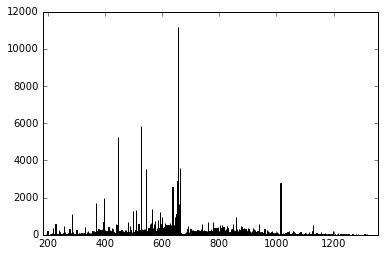

In [63]:
## 包含1000+个峰的质谱图示例
import matplotlib.pyplot as plt

% matplotlib inline

plt.bar(ms_xx_2,ms_yy_2)
plt.xlim(min(ms_xx_2),max(ms_xx_2))

<Container object of 104 artists>

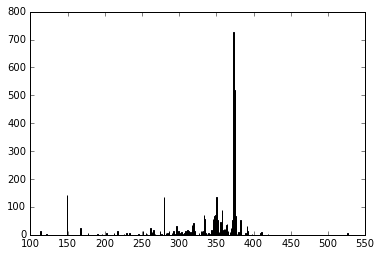

In [52]:
## 包含104个峰的质谱图示例
plt.bar(ms_xx_1,ms_yy_1)

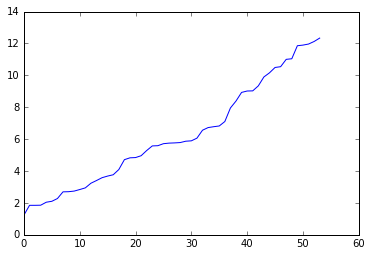

In [65]:
plt.plot(sorted(ms_yy_1)[0:-50])

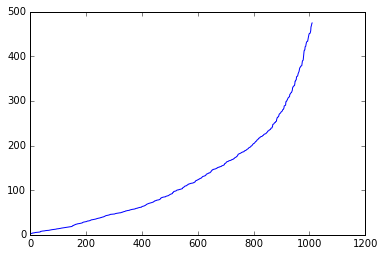

In [51]:
plt.plot(sorted(ms_yy_2)[0:-70])

In [40]:
tmp = [1,2,3,4,5]
tmp[-2]

4